In [133]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print sys.version
print "Pandas", pd.version.version

2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas 0.15.2


In [134]:
df = pd.read_csv('../csv_files/date_fixed_running_data.csv')

In [135]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [136]:
df["Unnamed: 0"].head()

0    2014-08-02
1    2014-08-03
2    2014-08-04
3    2014-08-05
4    2014-08-06
Name: Unnamed: 0, dtype: object

In [137]:
df = pd.read_csv('../csv_files/date_fixed_running_data.csv', parse_dates=[0])

In [138]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [139]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

In [140]:
cols = ["Dates", "Miles", "Time"]
df.columns = cols
df.head()

,Dates,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [141]:
df.rename(columns={df.columns[0]:"dates"})

,dates,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN
5,2014-08-07,2.30,NaN
6,2014-08-08,3.40,NaN
7,2014-08-09,2.50,NaN
8,2014-08-10,3.36,0:28:37
9,2014-08-11,1.67,0:13:07


In [142]:
df.set_index('Dates', inplace=True)

In [143]:
df.head()

,Miles,Time
Dates,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,0.00,NaN
2014-08-06,2.38,NaN


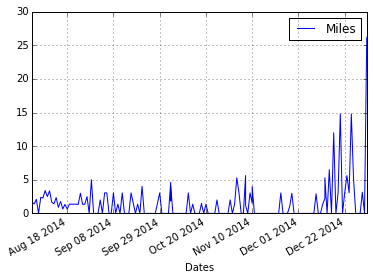

In [144]:
df.plot()

In [145]:
df.head(10)

,Miles,Time
Dates,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,0.00,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37


In [146]:
raw_time_fmt = df.Time[0]

def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return np.nan
    hours, minutes, seconds = str(raw_time).split(":")
    seconds = int(seconds) + 60 * int(minutes) + 60 * 60 * int(hours)
    return seconds


In [147]:
df["Seconds"] = df.Time.map(get_total_seconds)

In [148]:
df.head(10)

,Miles,Time,Seconds
Dates,,,
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN
2014-08-10,3.36,0:28:37,1717


In [149]:
df.describe()

,Miles,Seconds
count,166.000000,52.000000
mean,1.530964,1901.788462
std,2.979802,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.007500,1743.250000
max,26.200000,15643.000000


In [150]:
df.fillna(0).describe()

,Miles,Seconds
count,166.000000,166.000000
mean,1.530964,595.740964
std,2.979802,1676.040290
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.007500,561.750000
max,26.200000,15643.000000


In [151]:
df.fillna(0)

,Miles,Time,Seconds
Dates,,,
2014-08-02,1.70,0,0
2014-08-03,1.40,0,0
2014-08-04,2.10,0,0
2014-08-05,0.00,0,0
2014-08-06,2.38,0,0
2014-08-07,2.30,0,0
2014-08-08,3.40,0,0
2014-08-09,2.50,0,0
2014-08-10,3.36,0:28:37,1717


In [152]:
df.head()

,Miles,Time,Seconds
Dates,,,
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN


In [153]:
df["Minutes"] = df["Seconds"].map(lambda x: x / 60)

In [154]:
df.head(10)

,Miles,Time,Seconds,Minutes
Dates,,,,
2014-08-02,1.70,NaN,NaN,NaN
2014-08-03,1.40,NaN,NaN,NaN
2014-08-04,2.10,NaN,NaN,NaN
2014-08-05,0.00,NaN,NaN,NaN
2014-08-06,2.38,NaN,NaN,NaN
2014-08-07,2.30,NaN,NaN,NaN
2014-08-08,3.40,NaN,NaN,NaN
2014-08-09,2.50,NaN,NaN,NaN
2014-08-10,3.36,0:28:37,1717,28.616667


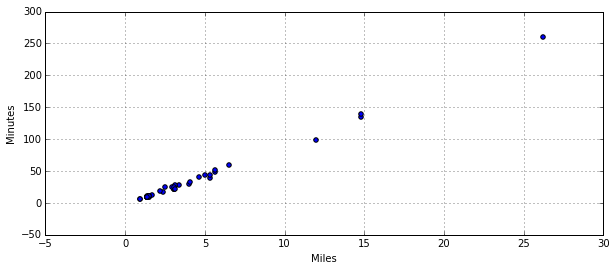

In [155]:
df.plot(x = "Miles", y ="Minutes", kind="scatter", figsize=(10,4))

In [156]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


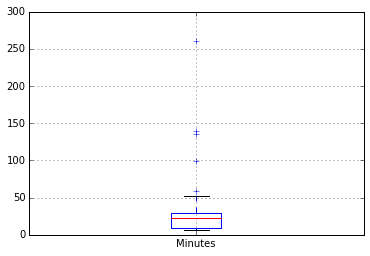

In [157]:
df.boxplot('Minutes', return_type='axes')

In [158]:
df['Minutes'] / df['Miles']

Dates
2014-08-02         NaN
2014-08-03         NaN
2014-08-04         NaN
2014-08-05         NaN
2014-08-06         NaN
2014-08-07         NaN
2014-08-08         NaN
2014-08-09         NaN
2014-08-10    8.516865
2014-08-11    7.854291
2014-08-12    7.453052
2014-08-13    7.411348
2014-08-14    6.962963
2014-08-14    6.962963
2014-08-15         NaN
...
2014-12-18         NaN
2014-12-19    8.467742
2014-12-20    9.121622
2014-12-21         NaN
2014-12-22    9.032258
2014-12-23    9.206631
2014-12-24    8.240437
2014-12-25    9.459459
2014-12-26         NaN
2014-12-27         NaN
2014-12-28         NaN
2014-12-29         NaN
2014-12-30    7.037037
2014-12-31         NaN
2015-01-01    9.951018
Length: 166

In [159]:
df['Min_per_Mile'] = df['Minutes'] / df['Miles']

In [160]:
df.describe()

,Miles,Seconds,Minutes,Min_per_Mile
count,166.000000,52.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474,7.725297
std,2.979802,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.007500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


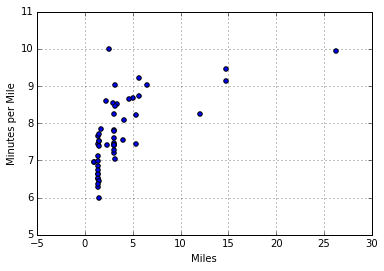

In [161]:
df.plot(x='Miles', y='Min_per_Mile', kind='scatter')
plt.ylabel("Minutes per Mile")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d17a310>]], dtype=object)

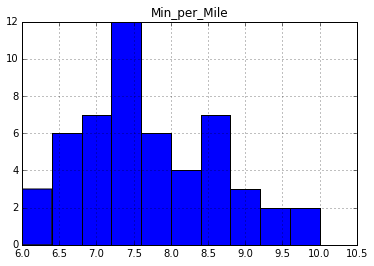

In [162]:
df.hist("Min_per_Mile")

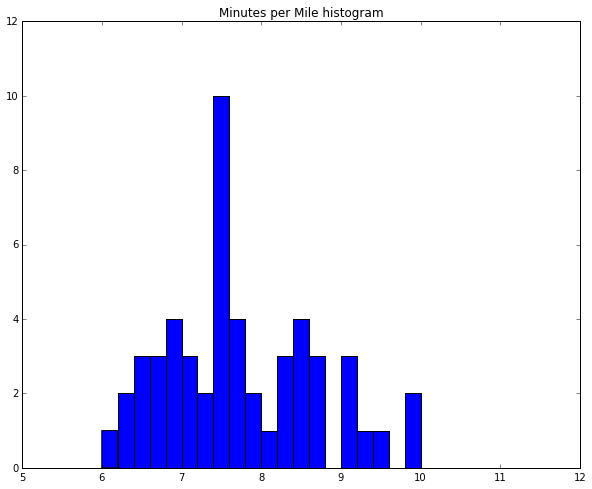

In [163]:
df.hist('Min_per_Mile', bins=20, figsize=(10,8))
plt.xlim((5,12))
plt.ylim((0,12))
plt.title("Minutes per Mile histogram")
plt.grid(False)
plt.savefig("../csv_files/minutes_per_mile_hist.png")

In [164]:
df.Miles

Dates
2014-08-02    1.70
2014-08-03    1.40
2014-08-04    2.10
2014-08-05    0.00
2014-08-06    2.38
2014-08-07    2.30
2014-08-08    3.40
2014-08-09    2.50
2014-08-10    3.36
2014-08-11    1.67
2014-08-12    1.42
2014-08-13    2.35
2014-08-14    0.90
2014-08-14    0.90
2014-08-15    1.78
...
2014-12-18     0.00
2014-12-19     3.10
2014-12-20    14.80
2014-12-21     0.00
2014-12-22     3.10
2014-12-23     5.63
2014-12-24     3.05
2014-12-25    14.80
2014-12-26     5.20
2014-12-27     0.00
2014-12-28     0.00
2014-12-29     0.00
2014-12-30     3.15
2014-12-31     0.00
2015-01-01    26.20
Name: Miles, Length: 166

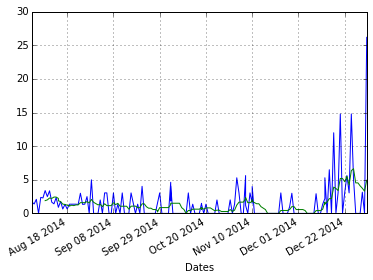

In [165]:
df.Miles.plot()
pd.rolling_mean(df.Miles, 7).plot()

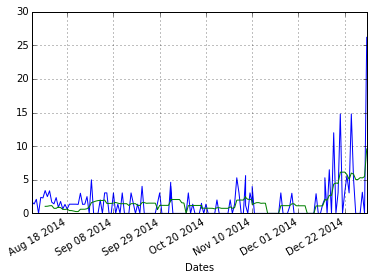

In [166]:
df.Miles.plot()
pd.rolling_std(df.Miles, 7).plot()

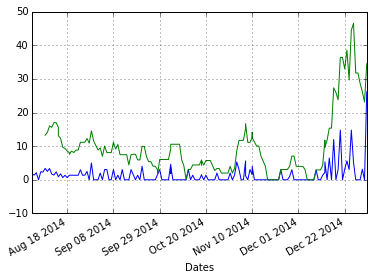

In [167]:
df.Miles.plot()
pd.rolling_sum(df.Miles, 7).plot()

In [168]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_Mile
Dates,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN


In [169]:
df.loc['2014-8-12']

Miles               1.42
Time             0:10:35
Seconds              635
Minutes         10.58333
Min_per_Mile    7.453052
Name: 2014-08-12 00:00:00, dtype: object

In [171]:
df.to_csv('../csv_files/date_fixed_running_data_with_time.csv')

In [174]:
df.reset_index().to_csv('../csv_files/date_fixed_running_data_with_time.csv')